This Dataset includes flight details such as **departure**, **arrival times**, **delays**, **carriers**, **distances**, and more. Our hope is to perform the following analysis

## Delay Analysis
1) **Average departure and arrival delays** by:
 * Carrier (carrier, name)
 * Airport (origin, dest)
 * Time (hour, month, day)
2) **Top Routes with the most delays**
3) **On-Time performance rates**

## Flight Performance
* Compare scheduled vs. actual times
* Detect patterns in delays

## Carrier Comparison
* Average delays per airline
* Number of flights operated
* Delay distributions across carriers

## Temporal Analysis
* Delays by time of day, day of week, or month
* Impact of flight timing on performance


In [146]:
import pandas as pd
import matplotlib.pyplot as plt

In [148]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mahoora00135/flights")

#print("Path to dataset files:", path)

In [150]:
path = f'{path}/flights.csv'
df = pd.read_csv(path)

sample_df = df.sample(n=1000, random_state=42)
sample_df.to_csv('sample_dataset.csv', index=False)

sample_df.info()
sample_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 159280 to 302020
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1000 non-null   int64  
 1   year            1000 non-null   int64  
 2   month           1000 non-null   int64  
 3   day             1000 non-null   int64  
 4   dep_time        971 non-null    float64
 5   sched_dep_time  1000 non-null   int64  
 6   dep_delay       971 non-null    float64
 7   arr_time        969 non-null    float64
 8   sched_arr_time  1000 non-null   int64  
 9   arr_delay       968 non-null    float64
 10  carrier         1000 non-null   object 
 11  flight          1000 non-null   int64  
 12  tailnum         989 non-null    object 
 13  origin          1000 non-null   object 
 14  dest            1000 non-null   object 
 15  air_time        968 non-null    float64
 16  distance        1000 non-null   int64  
 17  hour            1000 non-null  

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
159280,159280,2013,3,25,1929.0,1905,24.0,2236.0,2217,19.0,...,1471,N37298,EWR,RSW,169.0,1068,19,5,2013-03-25 19:00:00,United Air Lines Inc.
189101,189101,2013,4,26,956.0,1000,-4.0,1257.0,1334,-37.0,...,1765,N717TW,JFK,SFO,337.0,2586,10,0,2013-04-26 10:00:00,Delta Air Lines Inc.
212435,212435,2013,5,21,1320.0,1309,11.0,1430.0,1414,16.0,...,4129,N11536,EWR,DCA,39.0,199,13,9,2013-05-21 13:00:00,ExpressJet Airlines Inc.
266804,266804,2013,7,18,1222.0,1230,-8.0,1357.0,1419,-22.0,...,5796,N13958,EWR,CLT,77.0,529,12,30,2013-07-18 12:00:00,ExpressJet Airlines Inc.
306581,306581,2013,8,29,540.0,545,-5.0,921.0,921,0.0,...,939,N535JB,JFK,BQN,198.0,1576,5,45,2013-08-29 05:00:00,JetBlue Airways


# Delay Analysis

## Average departure and arrival delays

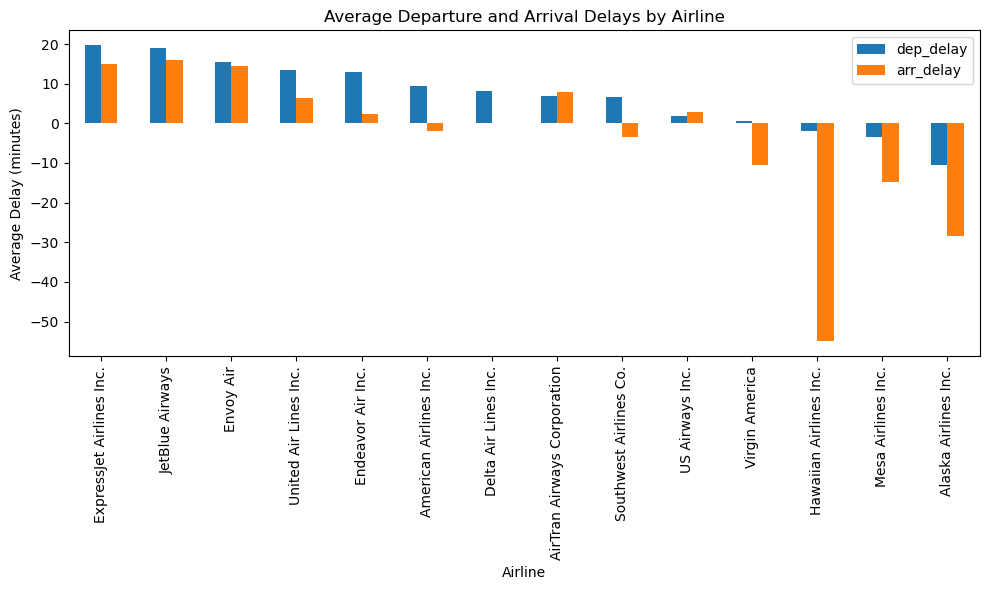

In [153]:
# We compute average departure and arrival delays by airline
avg_delays = sample_df.groupby("name")[["dep_delay", "arr_delay"]].mean()

# Then we sort by average departure delay descending
avg_delays = avg_delays.sort_values("dep_delay", ascending=False)

# Finally, we plot the average delays
ax = avg_delays.plot(kind="bar", figsize=(10, 6))
ax.set_xlabel("Airline")
ax.set_ylabel("Average Delay (minutes)")
ax.set_title("Average Departure and Arrival Delays by Airline")
plt.tight_layout()
plt.show()

The table and bar chart above show each airline’s **average departure** (dep_delay) and **arrival** (arr_delay) delays:
* **ExpressJet Airlines Inc.** and **JetBlue Airways** have the highest average departure delays (around 20 min) and similarly high arrival delays.
* **Envoy Air**, **United Air Lines Inc.**, and **Endeavor Air Inc.** also show significant delays on departure, though their arrival delays are generally lower.
* **Delta Air Lines Inc.**, **AirTran Airways**, and **Southwest Airlines Co.** fall in the mid-range for departure delays (5–10 min).
* **US Airways Inc.** and **Virgin America** hover near zero departure delay on average.
* **Hawaiian Airlines Inc.**, **Mesa Airlines Inc.**, and **Alaska Airlines Inc.** actually run slightly early on average (negative arrival delays), indicating good on-time performance.

#### Deeper Dive

,avg_dep_delay,std_dep_delay,on_time_rate,flight_count
name,,,,
ExpressJet Airlines Inc.,19.722222,42.162284,0.492063,126
JetBlue Airways,18.894118,56.089853,0.647059,170
Envoy Air,15.573333,39.513998,0.653333,75
United Air Lines Inc.,13.511236,40.610210,0.443820,178
Endeavor Air Inc.,13.065574,41.080761,0.590164,61
American Airlines Inc.,9.400000,32.700371,0.635294,85
Delta Air Lines Inc.,8.114094,33.274966,0.731544,149
AirTran Airways Corporation,6.928571,25.906531,0.571429,14
Southwest Airlines Co.,6.558824,15.564511,0.617647,34


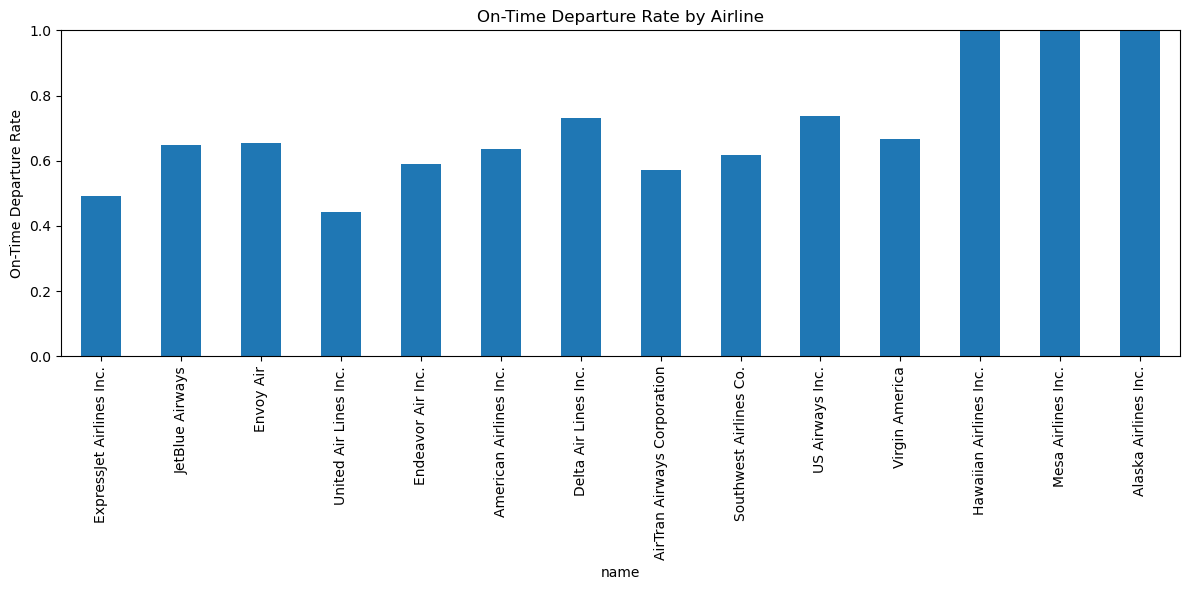

In [196]:
# We only consider flights with valid departure delay
df = sample_df.dropna(subset=["dep_delay"]).copy()

# We define on-time as departure delay <= 0 minutes
df["on_time"] = df["dep_delay"] <= 0


# We compute deeper metrics by airline
metrics = df.groupby("name").agg(
    avg_dep_delay=("dep_delay", "mean"),
    std_dep_delay=("dep_delay", "std"),
    on_time_rate=("on_time", "mean"),
    flight_count=("dep_delay", "size")
).sort_values("avg_dep_delay", ascending=False)

# We display the metrics
display(metrics)

# We plot on-time performance rate
plt.figure(figsize=(12, 6))
metrics["on_time_rate"].plot(kind="bar")
plt.ylabel("On-Time Departure Rate")
plt.ylim(0, 1)
plt.title("On-Time Departure Rate by Airline")
plt.tight_layout()
plt.show()

**Insights**:
* **Delta Air Lines Inc.** and **US Airways Inc.** lead with the highest on-time rates (~73%).
* **ExpressJet Airlines Inc.** has the lowest on-time departure rate (~49%) and the largest average delay.
* **Airlines like Hawaiian**, **Mesa**, and **Alaska** achieve 100% on-time departures in this sample (note: check sample size for these carriers).

# Delay Analysis

## Top Routes with the most delays

Top 10 Routes by Number of Delayed Departures:

origin dest  total_flights  delayed_flights  delay_rate
   LGA  ATL             37               14    0.378378
   EWR  IAH             18               11    0.611111
   EWR  ORD             17               10    0.588235
   EWR  DEN             17               10    0.588235
   EWR  MCO             22               10    0.454545
   EWR  SFO             16                9    0.562500
   JFK  SJU             16                9    0.562500
   JFK  SFO             14                8    0.571429
   LGA  FLL             19                8    0.421053
   JFK  BOS             18                7    0.388889


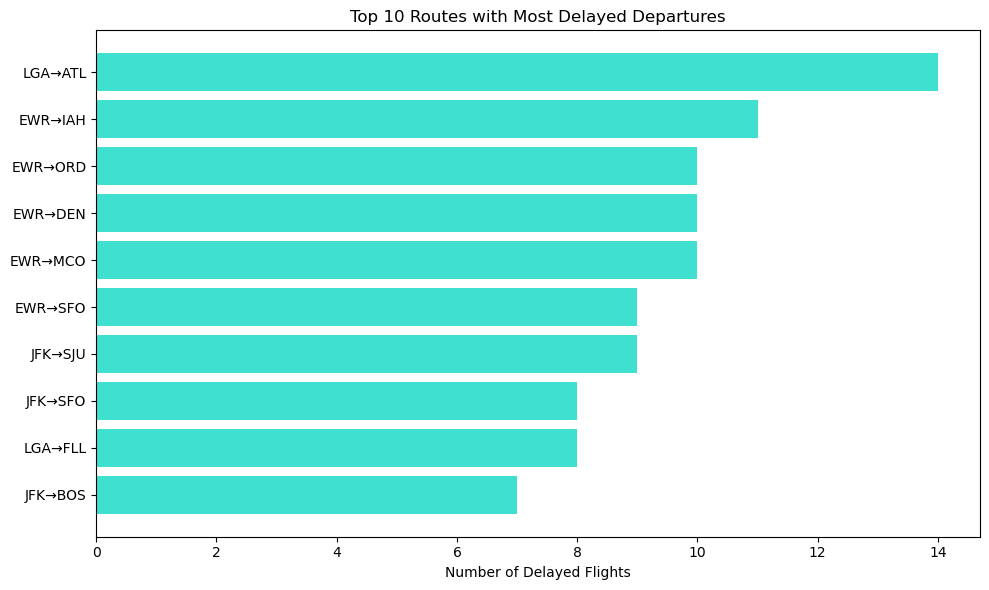

In [162]:
# We only consider flights with valid departure delay
df = sample_df.dropna(subset=["dep_delay"]).copy()

# We flag which flights departed late
df["is_delayed"] = df["dep_delay"] > 0


# We aggregate by route (origin → destination)
route_metrics = (
    df
    .groupby(["origin", "dest"])
    .agg(
        total_flights   = ("is_delayed", "size"),
        delayed_flights = ("is_delayed", "sum")
    )
    .reset_index()
)

# We compute delay rate
route_metrics["delay_rate"] = (
    route_metrics["delayed_flights"] 
    / route_metrics["total_flights"]
)

# We select top 10 routes by number of delayed departures
top_routes = route_metrics.sort_values(
    by="delayed_flights", 
    ascending=False
).head(10)

# We display the results
print("Top 10 Routes by Number of Delayed Departures:\n")
print(top_routes.to_string(index=False))

# We visualize with a horizontal bar chart
plt.figure(figsize=(10, 6))
labels = top_routes.apply(lambda row: f"{row.origin}→{row.dest}", axis=1)
delays = top_routes["delayed_flights"]
plt.barh(labels[::-1], delays[::-1], color="turquoise")
plt.xlabel("Number of Delayed Flights")
plt.title("Top 10 Routes with Most Delayed Departures")
plt.tight_layout()
plt.show()

# Delay Analysis

## On-Time performance rates

On-Time Performance by Airline:

                       name  total_flights  on_time_flights  on_time_rate
AirTran Airways Corporation             14                8      0.571429
       Alaska Airlines Inc.              2                2      1.000000
     American Airlines Inc.             85               54      0.635294
       Delta Air Lines Inc.            149              109      0.731544
          Endeavor Air Inc.             61               36      0.590164
                  Envoy Air             75               49      0.653333
   ExpressJet Airlines Inc.            126               62      0.492063
     Hawaiian Airlines Inc.              1                1      1.000000
            JetBlue Airways            170              110      0.647059
         Mesa Airlines Inc.              4                4      1.000000
     Southwest Airlines Co.             34               21      0.617647
            US Airways Inc.             57               42      0.736842
     

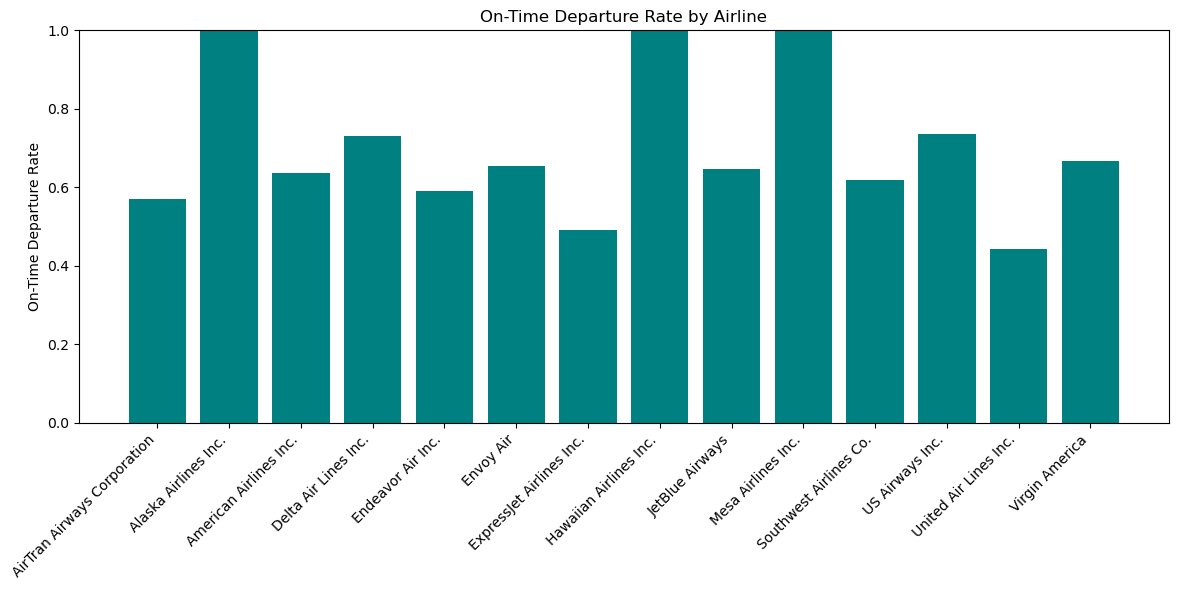


Top 10 Routes by On-Time Rate:
origin dest  total_flights  on_time_flights  on_time_rate
   EWR  ALB              1                1           1.0
   JFK  SRQ              1                1           1.0
   LGA  IAH              3                3           1.0
   LGA  IAD              3                3           1.0
   JFK  LGB              2                2           1.0
   JFK  MVY              1                1           1.0
   JFK  OAK              2                2           1.0
   LGA  DAY              3                3           1.0
   LGA  CRW              1                1           1.0
   JFK  ORF              1                1           1.0

Bottom 10 Routes by On-Time Rate:
origin dest  total_flights  on_time_flights  on_time_rate
   JFK  DFW              1                0           0.0
   EWR  HNL              2                0           0.0
   EWR  JAC              1                0           0.0
   EWR  MKE              1                0           0.0
   EW

In [165]:
# We drop rows with missing departure delay and make a copy
df = sample_df.dropna(subset=["dep_delay"]).copy()

# We flag on-time departures (dep_delay ≤ 0)
df["on_time"] = df["dep_delay"] <= 0

# We compute on-time performance by airline
airline_perf = (
    df
    .groupby("name")
    .agg(
        total_flights    = ("on_time", "size"),
        on_time_flights  = ("on_time", "sum")
    )
    .reset_index()
)
airline_perf["on_time_rate"] = (
    airline_perf["on_time_flights"] 
    / airline_perf["total_flights"]
)

print("On-Time Performance by Airline:\n")
print(airline_perf[[
    "name", "total_flights", "on_time_flights", "on_time_rate"
]].to_string(index=False))

# We plot on-time rate for each airline
plt.figure(figsize=(12, 6))
plt.bar(
    airline_perf["name"], 
    airline_perf["on_time_rate"], 
    color="teal"
)
plt.ylabel("On-Time Departure Rate")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha="right")
plt.title("On-Time Departure Rate by Airline")
plt.tight_layout()
plt.show()

# We compute on-time performance by route (origin → dest)
route_perf = (
    df
    .groupby(["origin", "dest"])
    .agg(
        total_flights   = ("on_time", "size"),
        on_time_flights = ("on_time", "sum")
    )
    .reset_index()
)
route_perf["on_time_rate"] = (
    route_perf["on_time_flights"] 
    / route_perf["total_flights"]
)

# We show top 10 best and worst routes by on-time rate
best_routes = route_perf.sort_values("on_time_rate", ascending=False).head(10)
worst_routes = route_perf.sort_values("on_time_rate", ascending=True).head(10)

print("\nTop 10 Routes by On-Time Rate:")
print(best_routes.to_string(index=False))

print("\nBottom 10 Routes by On-Time Rate:")
print(worst_routes.to_string(index=False))

#### Explanation of the results

* We flag flights as “on time” if departure delay is ≤ 0.
* We aggregates by **airline** to compute total flights, on-time flights, and on-time rate.
* We prints the airline performance table and plots the on-time rates.
* We aggregates by **route** (origin→destination) to compute the same metrics.
* We prints the **top 10** and **bottom 10** routes by on-time performance.

# Flight Performance

## Compare scheduled vs. actual times

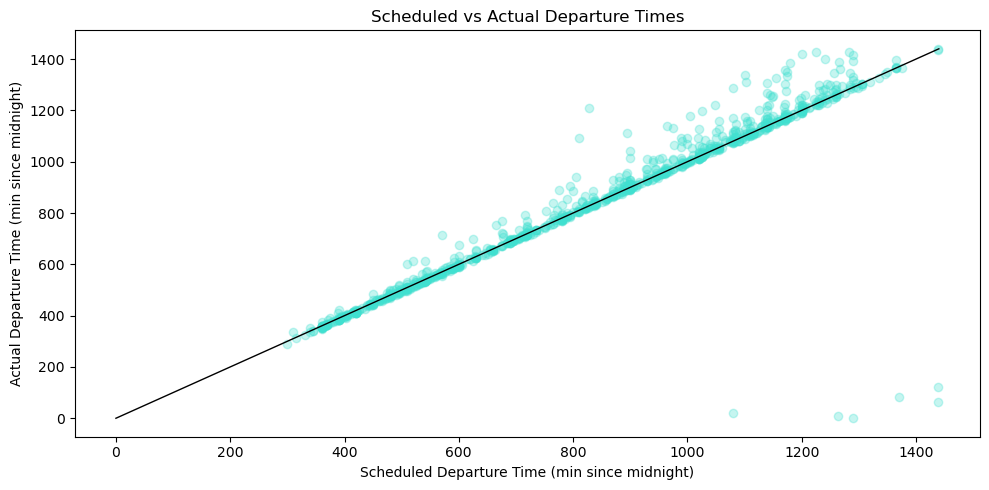

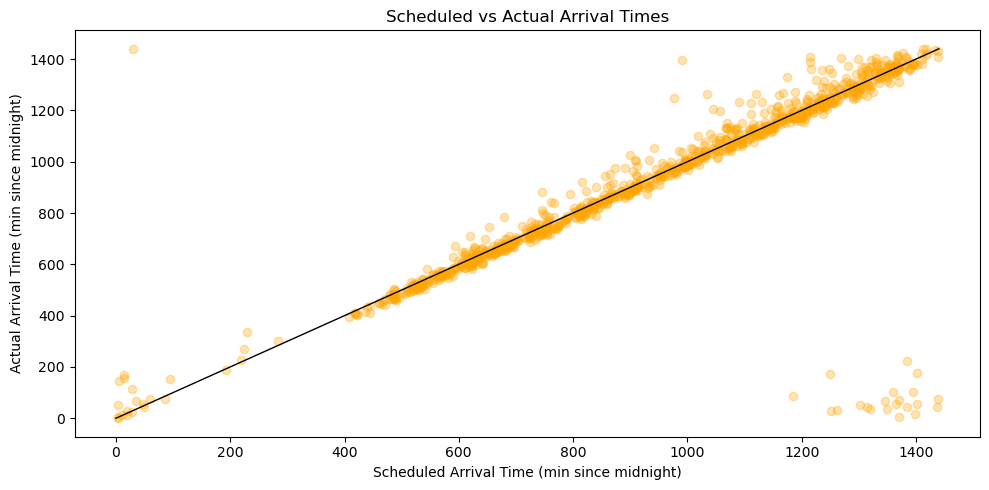

Departure time correlation: 0.93
Arrival time correlation: 0.81


In [169]:
# We drop rows with missing scheduled/actual times
df = sample_df.dropna(subset=["sched_dep_time", "dep_time", "sched_arr_time", "arr_time"]).copy()

# We build a function to convert HHMM to minutes from midnight
def to_minutes(t):
    t_int = int(t)
    hh = t_int // 100
    mm = t_int % 100
    return hh * 60 + mm

# We apply conversion
df["sched_dep_min"] = df["sched_dep_time"].apply(to_minutes)
df["dep_min"] = df["dep_time"].apply(to_minutes)
df["sched_arr_min"] = df["sched_arr_time"].apply(to_minutes)
df["arr_min"] = df["arr_time"].apply(to_minutes)

# We use scatter plot: scheduled vs actual departure times
plt.figure(figsize=(10, 5))
plt.scatter(df["sched_dep_min"], df["dep_min"], alpha=0.3, color="turquoise")
plt.plot([0, 24*60], [0, 24*60], color="black", linewidth=1)
plt.xlabel("Scheduled Departure Time (min since midnight)")
plt.ylabel("Actual Departure Time (min since midnight)")
plt.title("Scheduled vs Actual Departure Times")
plt.tight_layout()
plt.show()

# We use scatter plot: scheduled vs actual arrival times
plt.figure(figsize=(10, 5))
plt.scatter(df["sched_arr_min"], df["arr_min"], alpha=0.3, color="orange")
plt.plot([0, 24*60], [0, 24*60], color="black", linewidth=1)
plt.xlabel("Scheduled Arrival Time (min since midnight)")
plt.ylabel("Actual Arrival Time (min since midnight)")
plt.title("Scheduled vs Actual Arrival Times")
plt.tight_layout()
plt.show()

# We compute and print correlations
corr_dep = df["sched_dep_min"].corr(df["dep_min"])
corr_arr = df["sched_arr_min"].corr(df["arr_min"])
print(f"Departure time correlation: {corr_dep:.2f}")
print(f"Arrival time correlation: {corr_arr:.2f}")

The scatter plots above are to compare **scheduled** vs. **actual** times (in minutes since midnight) for departures and arrivals:
* **Departure correlation (r = 0.93)**: Strong alignment between scheduled and actual departure times, with most points near the 45° line—late departures tend to stay late.
* **Arrival correlation (r = 0.81)**: Still strong, but more spread—some flights make up time in the air (points below the line) or lose even more (points above).

In this visualization we identify:
* **Clusters** of consistently late flights (points above the identity line).
* **Outliers** where an early departure led to an even earlier arrival (points well below the line).

# Flight Performance

## Detect patterns in delays

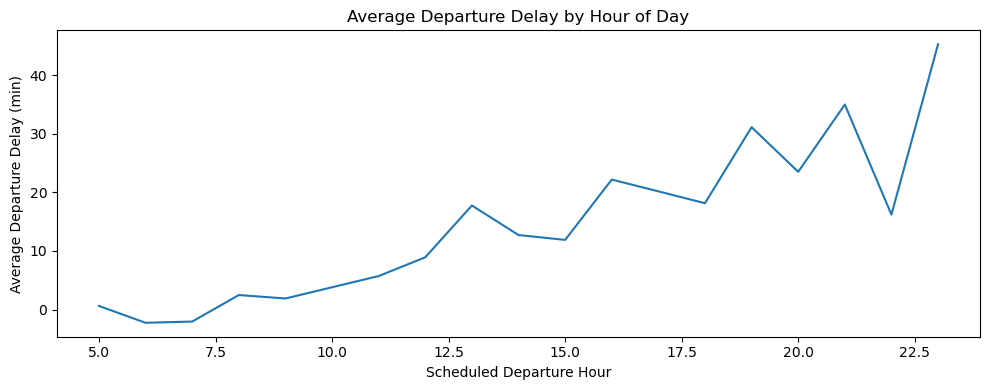

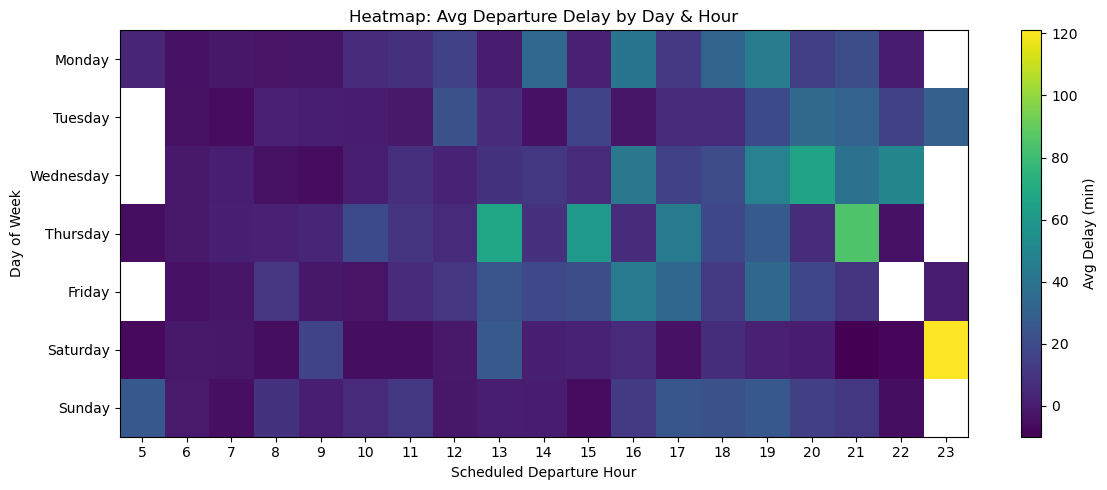

In [173]:
# We drop rows with missing scheduled/actual times
df = sample_df.dropna(subset=["dep_delay", "time_hour"]).copy()

# Here, we are applying conversion
df["time_hour"] = pd.to_datetime(df["time_hour"])
df["day_of_week"] = df["time_hour"].dt.day_name()

# We average the delay by departure hour
avg_delay_hour = df.groupby("hour")["dep_delay"].mean()

plt.figure(figsize=(10, 4))
avg_delay_hour.plot(kind="line")
plt.xlabel("Scheduled Departure Hour")
plt.ylabel("Average Departure Delay (min)")
plt.title("Average Departure Delay by Hour of Day")
plt.tight_layout()
plt.show()

# We heatmap the average delay by day of week and hour
pivot = df.pivot_table(
    index="day_of_week",
    columns="hour",
    values="dep_delay",
    aggfunc="mean"
)
# We ensure days are in calendar order
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
pivot = pivot.reindex(days)

plt.figure(figsize=(12, 5))
plt.imshow(pivot, aspect="auto")
plt.xticks(range(len(pivot.columns)), pivot.columns)
plt.yticks(range(len(pivot.index)), pivot.index)
plt.xlabel("Scheduled Departure Hour")
plt.ylabel("Day of Week")
plt.title("Heatmap: Avg Departure Delay by Day & Hour")
plt.colorbar(label="Avg Delay (min)")
plt.tight_layout()
plt.show()

From these visualizations, we can detect clear delay patterns:
1) **By Hour of Day (Line Plot)**
 * **Early-morning flights (around 5–7 AM)** often depart slightly early or right on time (negative to low delays).
 * **Midday (11 AM–1 PM)** shows a gradual ramp-up, hitting around 10 minutes average delay.
 * **Afternoon rush (1–3 PM)** peaks again (~18 min at 1 PM).
 * **Evening slots (6–9 PM)** suffer the **highest delays** (20–35 min), likely cascading from earlier traffic.
 * **Late night (10–11 PM)** remains elevated (~15–45 min).
2) **By Day of Week & Hour (Heatmap)**
  * **Weekdays** (Tue–Thu) tend to have higher midday and evening delays than weekends, especially on Thursday afternoons/early evenings.
  * **Saturday** has relatively low delays during most hours but a spike at 11 PM (fewer late-night flights making up time).
  * **Sunday** mornings can show some larger delays (e.g. Sunday at 5 AM), perhaps due to reduced staffing.

Takeaways:
 * **Schedule buffer**: If you’re planning an evening departure, build in a larger cushion for potential delays.
 * **Midweek traffic**: Watch for higher delays on Thursdays.
 * **Early flights**: Generally the most reliable.

# Temporal Analysis

## Delays by time of day, day of week, or month

In [184]:
import calendar

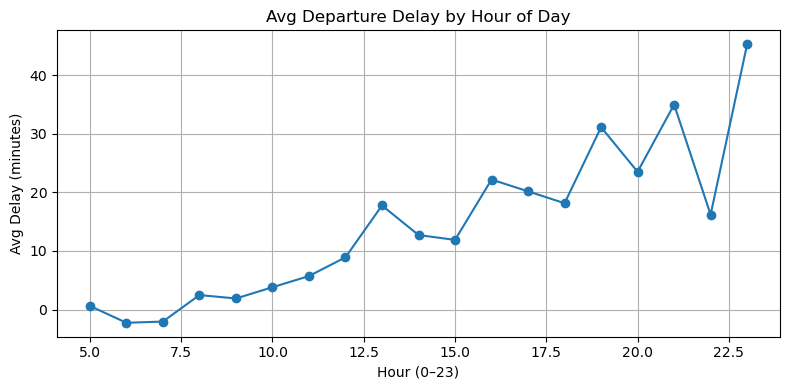

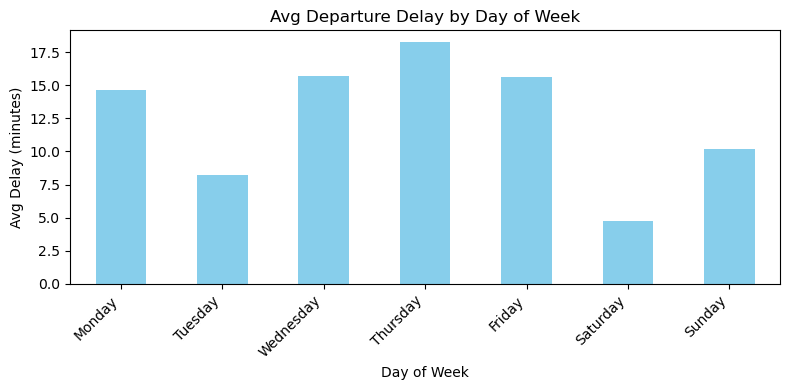

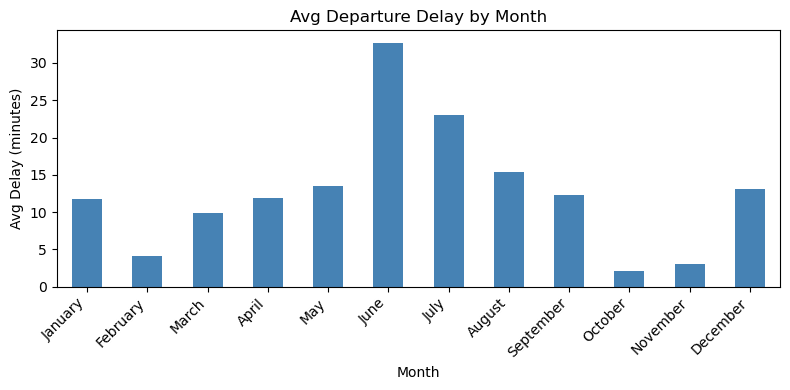

In [186]:
# We parse timestamps & extract features
df = sample_df
df['time_hour'] = pd.to_datetime(df['time_hour'])
df['hour']        = df['time_hour'].dt.hour
df['dow']         = df['time_hour'].dt.day_name()
df['month_num']   = df['time_hour'].dt.month
df['month']       = df['month_num'].apply(lambda m: calendar.month_name[m])

# Then we average the departure delay by hour
avg_by_hour = df.groupby('hour')['dep_delay'].mean()

plt.figure(figsize=(8,4))
avg_by_hour.plot(kind='line', marker='o')
plt.title('Avg Departure Delay by Hour of Day')
plt.xlabel('Hour (0–23)')
plt.ylabel('Avg Delay (minutes)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Now, we average departure delay by day of week
dow_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
avg_by_dow = df.groupby('dow')['dep_delay'].mean().reindex(dow_order)

plt.figure(figsize=(8,4))
avg_by_dow.plot(kind='bar', color='skyblue')
plt.title('Avg Departure Delay by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Avg Delay (minutes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Then we average departure delay by month
avg_by_month = (
    df.groupby('month_num')['dep_delay']
      .mean()
      .sort_index()
)
avg_by_month.index = avg_by_month.index.map(lambda m: calendar.month_name[m])

plt.figure(figsize=(8,4))
avg_by_month.plot(kind='bar', color='steelblue')
plt.title('Avg Departure Delay by Month')
plt.xlabel('Month')
plt.ylabel('Avg Delay (minutes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Here is the description of the above graphs:
1) **Line** plot of average delay across each hour (0-23), highlighting peak rush-hour slowdowns.
2) **Bar** chart showing which weekdays suffer the worst (and best) departure punctuality.
3) **Bar** chart of seasonal trends.